## Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
from collections import Counter
from textblob import TextBlob
import plotly.express as px
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## YouTube Videos Analysis

### Loading the dataset and Data Preprocessing

**Merging all the datasets for the 10 countries**

In [3]:
countries = ['US', 'CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU']
df_list = []

for country in countries:
    temp_df = pd.read_csv(f"Dataset/{country}videos.csv", encoding='latin1')
    temp_df['country'] = country
    df_list.append(temp_df)

merged_df = pd.concat(df_list, ignore_index=True)

In [4]:
merged_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

In [6]:
df = merged_df.copy()

**Category Mapping**

In [7]:
with open('Dataset/US_category_id.json') as f:
    data = json.load(f)

category_mapping = {}
for item in data['items']:
    category_mapping[int(item['id'])] = item['snippet']['title']

df['category_name'] = df['category_id'].map(category_mapping)

In [8]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,Entertainment


**Convert date columns to datetime**

In [9]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

**Check for Duplicates**

In [10]:
duplicate_rows = df.duplicated()
print(f"Total duplicate rows: {duplicate_rows.sum()}")

Total duplicate rows: 12570


In [11]:
df = df.drop_duplicates()

**Check for missing values**

In [12]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing values:\n", missing)

Missing values:
 description    18681
dtype: int64


In [13]:
df['description'].fillna('', inplace=True)

#### Feature Engineering

In [14]:
df['publish_dayofweek'] = df['publish_time'].dt.day_name()
df['publish_hour'] = df['publish_time'].dt.hour
df['trending_dayofweek'] = df['trending_date'].dt.day_name()
df['publish_date'] = df['publish_time'].dt.date

In [15]:
df['like_ratio'] = df['likes'] / df['views']
df['dislike_ratio'] = df['dislikes'] / df['views']
df['engagement_ratio'] = (df['likes'] + df['dislikes'] + df['comment_count']) / df['views']

In [16]:
df['tags'] = df['tags'].apply(lambda x: x.lower().split('|') if x != '[none]' else [])

#### How are engagement metrics (views, likes and dislikes) distributed overall and across different video categories?

**Overall Distribution**

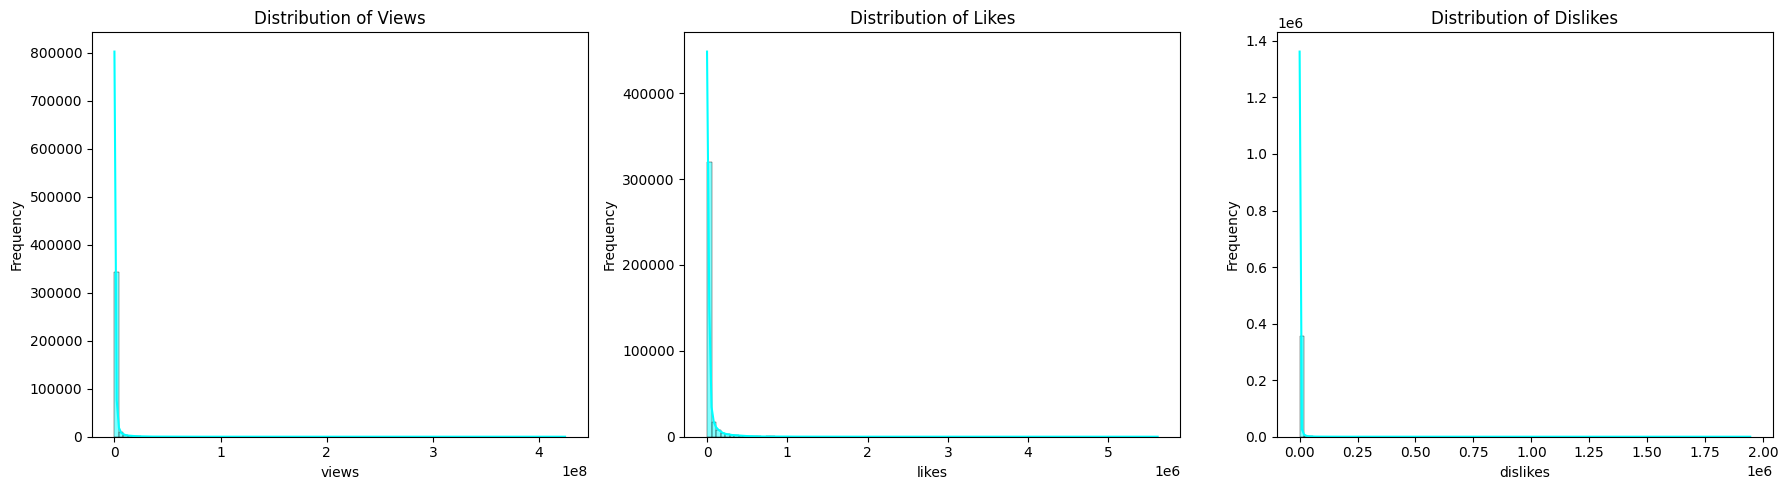

In [17]:
metrics = ['views', 'likes', 'dislikes']

plt.figure(figsize=(18, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[metric], bins=100, kde=True, color='cyan')
    plt.title(f'Distribution of {metric.capitalize()}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Distribution by Category**

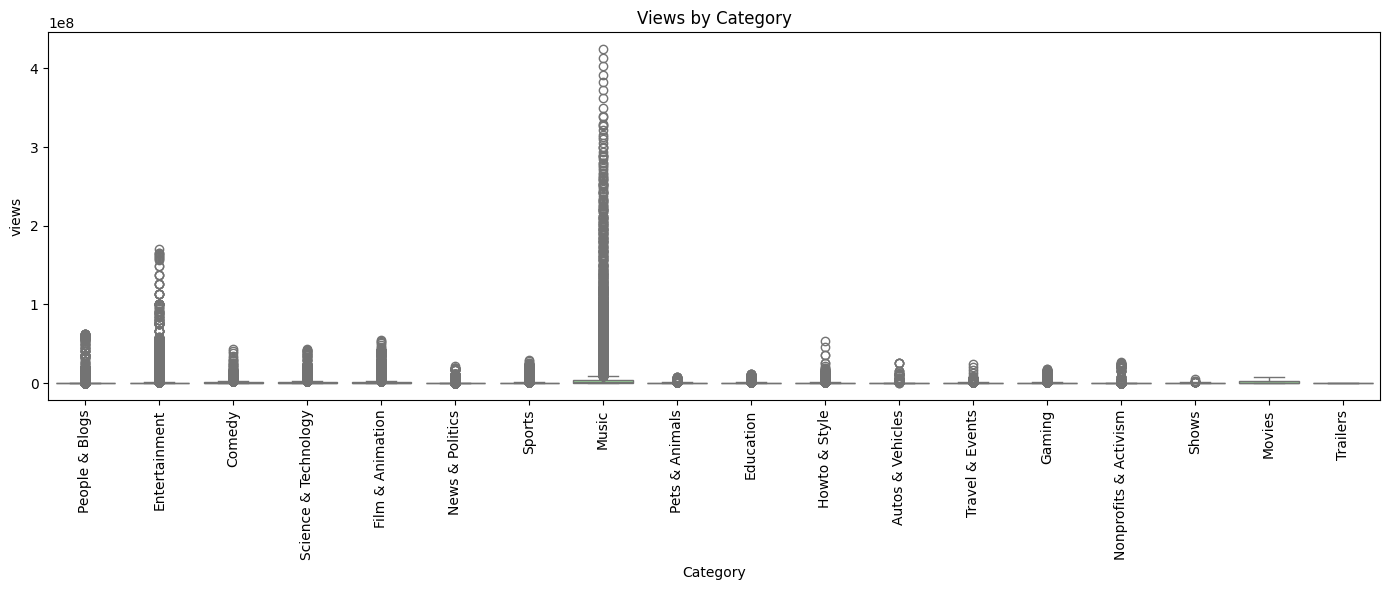

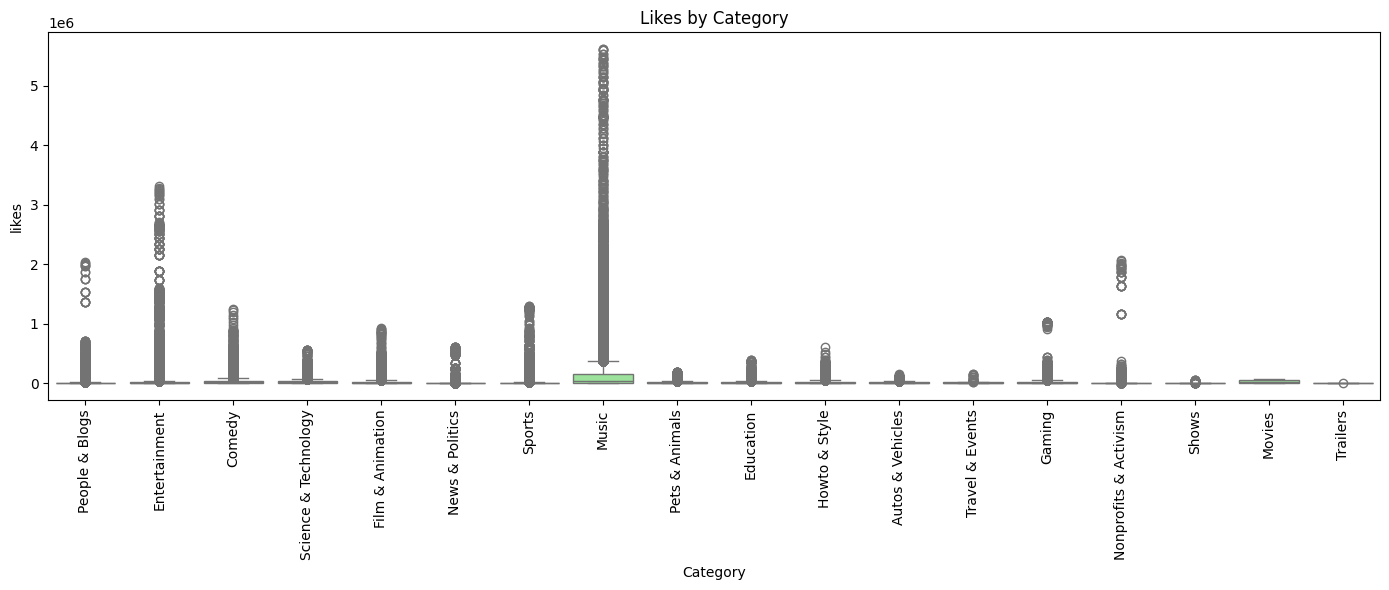

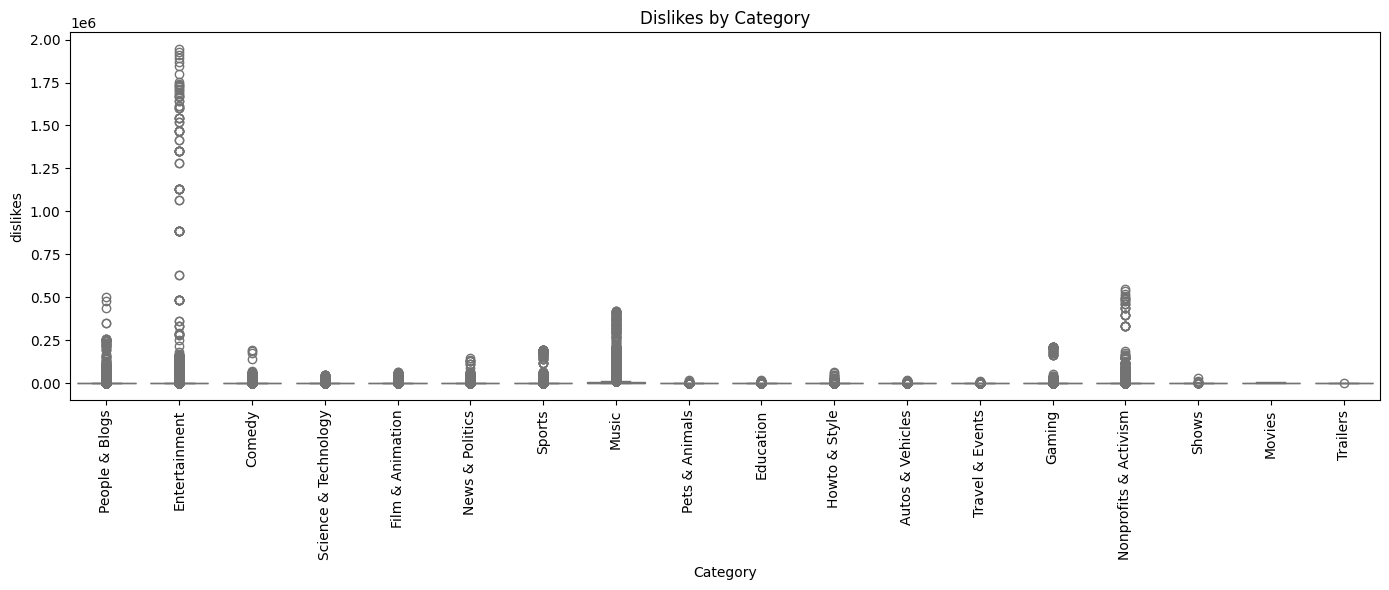

In [71]:
for metric in metrics:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='category_name', y=metric, data=df, color='lightgreen')
    plt.title(f'{metric.capitalize()} by Category')
    plt.xticks(rotation=90)
    plt.ylabel(metric)
    plt.xlabel('Category')
    plt.tight_layout()
    plt.show()

#### Which YouTube channels and video categories trend the most in each country and globally?

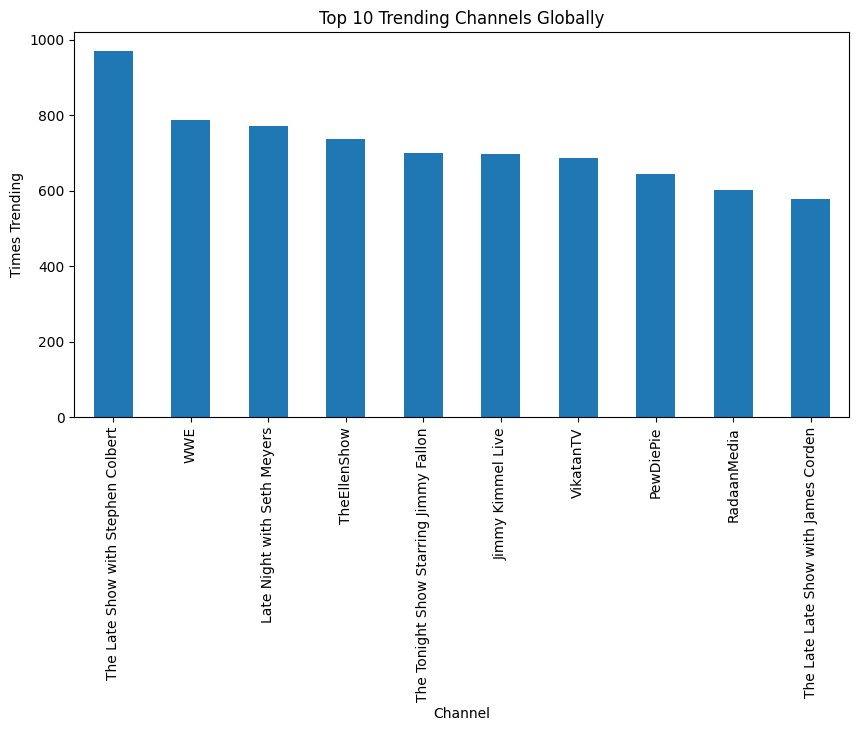

In [41]:
top_channels = df['channel_title'].value_counts().head(10)
top_channels.plot(kind='bar', figsize=(10, 5), title='Top 10 Trending Channels Globally')
plt.xlabel('Channel')
plt.ylabel('Times Trending')
plt.show()

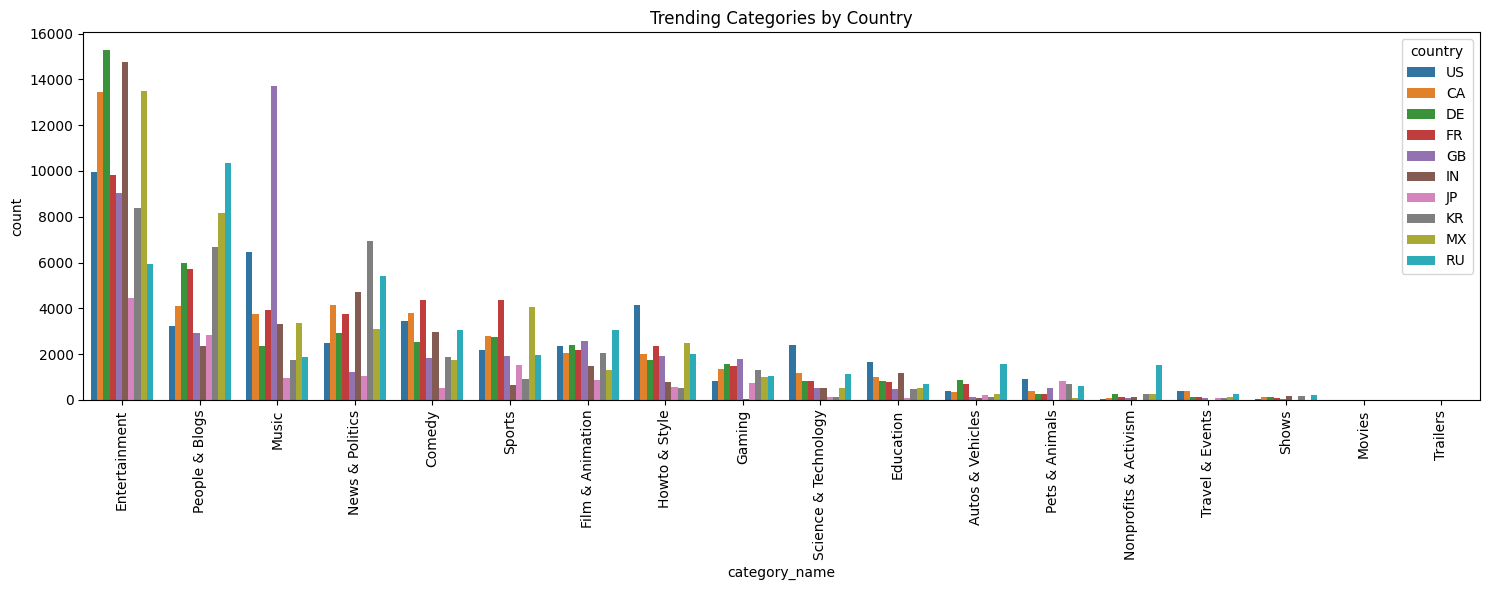

In [73]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='category_name', hue='country', order=df['category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Trending Categories by Country")
plt.tight_layout()
plt.show()

#### Are there seasonal or day-of-week patterns in trending videos? How does upload day/time impact engagement?

**Upload Day of Week**

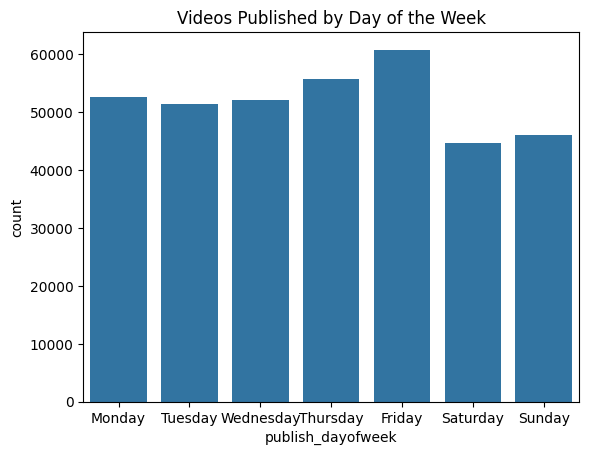

In [74]:
sns.countplot(data=df, x='publish_dayofweek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Videos Published by Day of the Week')
plt.show()

**Hourly Uploads**

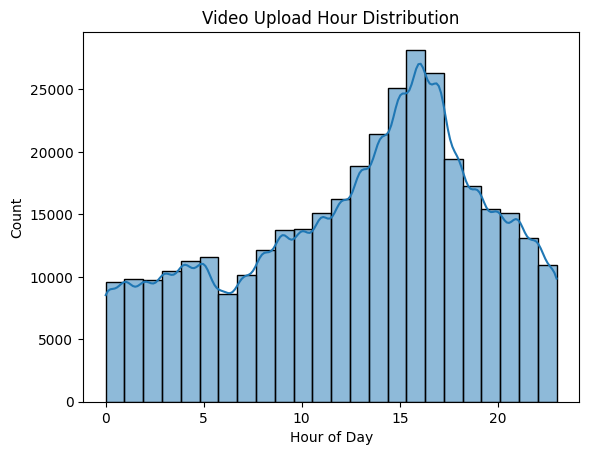

In [75]:
sns.histplot(df['publish_hour'], bins=24, kde=True)
plt.title('Video Upload Hour Distribution')
plt.xlabel('Hour of Day')
plt.show()

**Engagement by Upload Time**

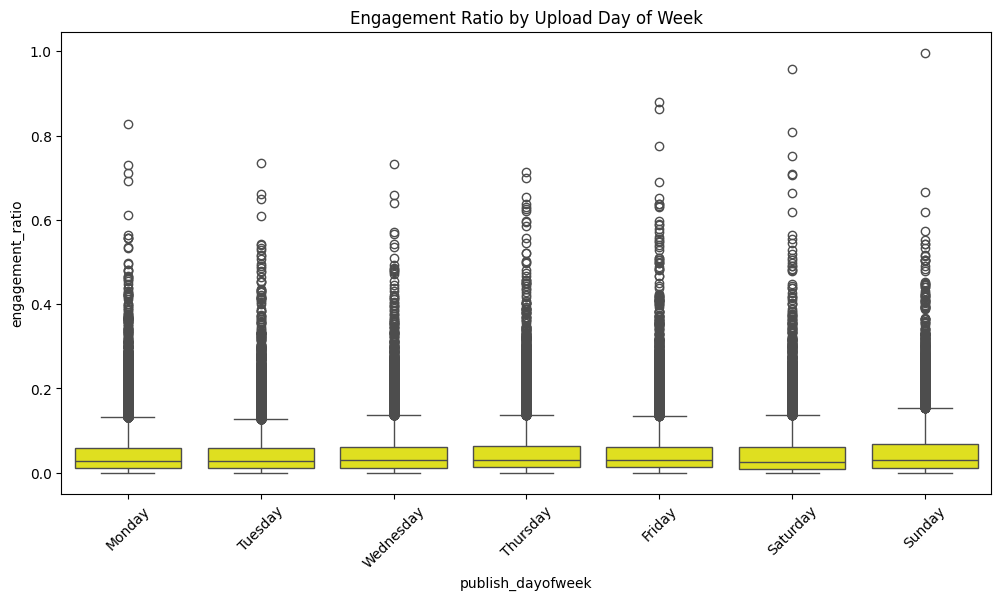

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='publish_dayofweek', y='engagement_ratio', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='yellow')
plt.title('Engagement Ratio by Upload Day of Week')
plt.xticks(rotation=45)
plt.show()

#### Do controversial videos (high dislike ratio) get more engagement than universally liked ones?

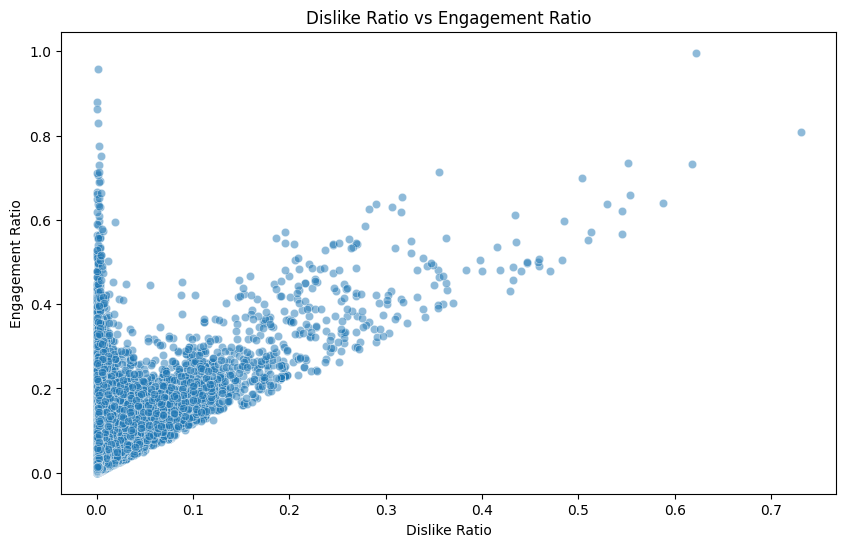

In [78]:
df['dislike_ratio'] = df['dislikes'] / df['views']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dislike_ratio', y='engagement_ratio', alpha=0.5)
plt.title('Dislike Ratio vs Engagement Ratio')
plt.xlabel('Dislike Ratio')
plt.ylabel('Engagement Ratio')
plt.show()

In [79]:
print(df[['dislike_ratio', 'engagement_ratio']].corr())

                  dislike_ratio  engagement_ratio
dislike_ratio          1.000000          0.330449
engagement_ratio       0.330449          1.000000


#### How do video tags influence engagement, and which tags are most commonly used in trending videos?

**Most Common Tags:**

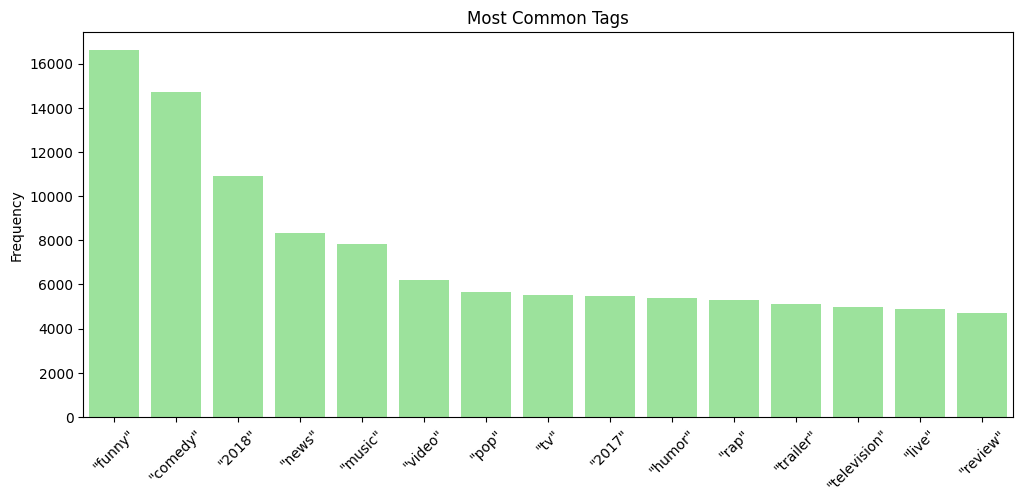

In [85]:
all_tags = df['tags'].explode()
tag_counter = Counter([tag.strip() for tags in df['tags'] for tag in tags])
top_tags = dict(tag_counter.most_common(15))

plt.figure(figsize=(12, 5))
sns.barplot(x=list(top_tags.keys()), y=list(top_tags.values()), color='lightgreen')
plt.title("Most Common Tags")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

**Tag Count vs Engagement**

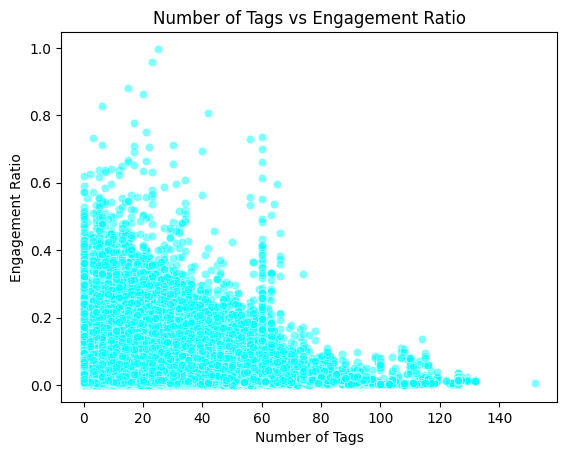

In [86]:
df['tag_count'] = df['tags'].apply(len)

sns.scatterplot(data=df, x='tag_count', y='engagement_ratio', alpha=0.5, color='cyan')
plt.title("Number of Tags vs Engagement Ratio")
plt.xlabel("Number of Tags")
plt.ylabel("Engagement Ratio")
plt.show()

#### How does the length of a video title impact engagement?

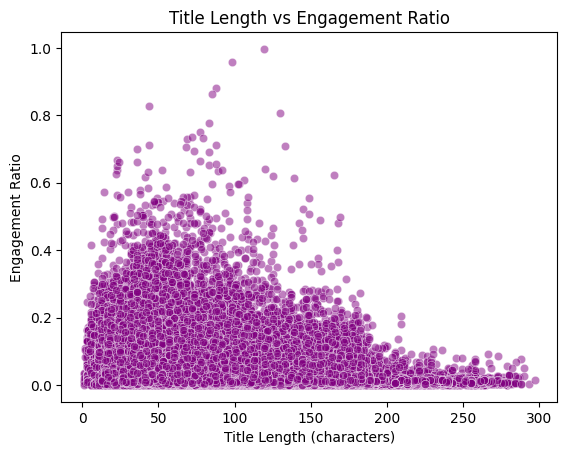

In [88]:
df['title_length'] = df['title'].apply(len)

sns.scatterplot(data=df, x='title_length', y='engagement_ratio', alpha=0.5, color='purple')
plt.title("Title Length vs Engagement Ratio")
plt.xlabel("Title Length (characters)")
plt.ylabel("Engagement Ratio")
plt.show()

#### Is there a relationship between video title sentiment and engagement?

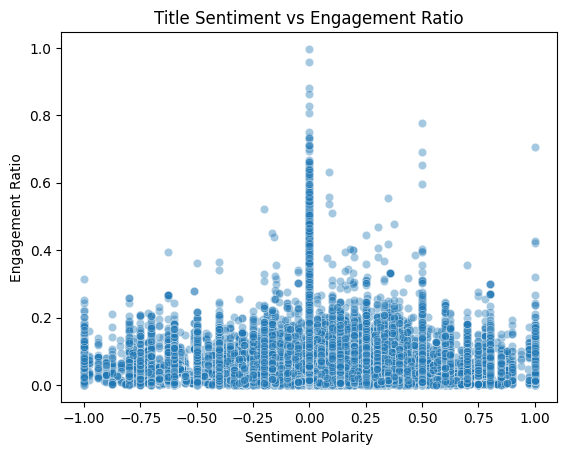

In [90]:
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.scatterplot(x='title_sentiment', y='engagement_ratio', data=df, alpha=0.4)
plt.title("Title Sentiment vs Engagement Ratio")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Engagement Ratio")
plt.show()

#### Do clickbait-style titles (e.g., "shocking", "must watch") result in higher engagement?

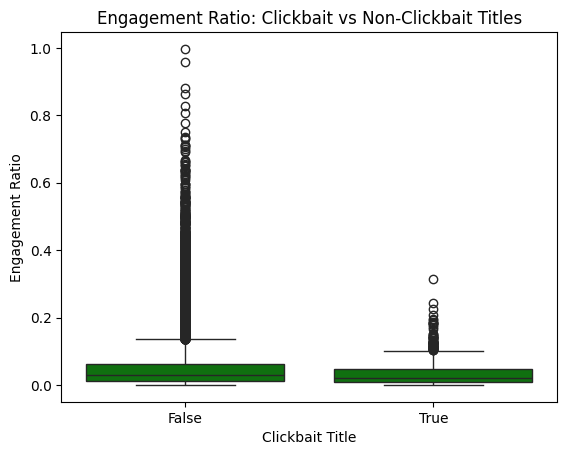

In [ ]:
clickbait_keywords = ['shocking', 'must watch', 'unbelievable', 'insane', 'you won’t believe', 'crazy']

df['is_clickbait'] = df['title'].str.lower().apply(lambda x: any(keyword in x for keyword in clickbait_keywords))

sns.boxplot(data=df, x='is_clickbait', y='engagement_ratio', color='green')
plt.title("Engagement Ratio: Clickbait vs Non-Clickbait Titles")
plt.xlabel("Clickbait Title")
plt.ylabel("Engagement Ratio")
plt.show()

### Additional Questions

#### 1. How does the average engagement (likes/views, comments/views) differ across countries for the same video categories?

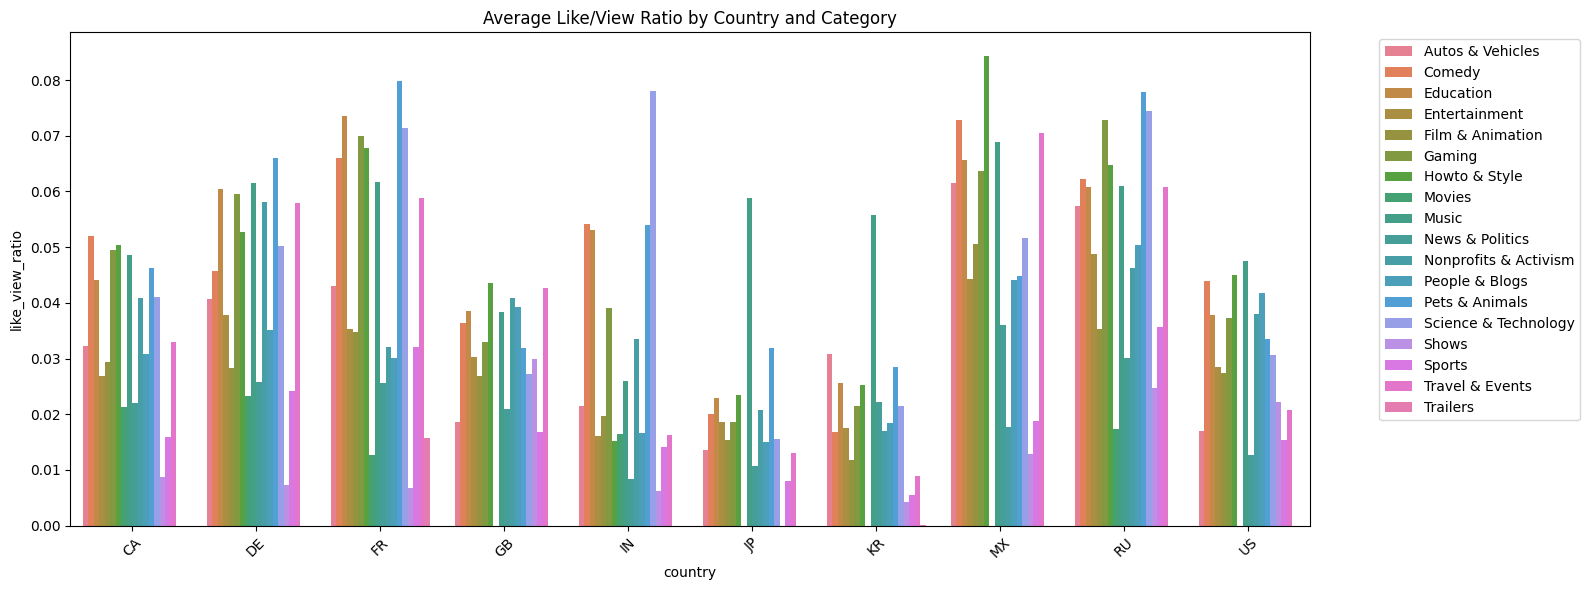

In [18]:
df['like_view_ratio'] = df['likes'] / df['views']
df['comment_view_ratio'] = df['comment_count'] / df['views']

engagement_by_country_cat = df.groupby(['country', 'category_name']).agg({
    'like_view_ratio': 'mean',
    'comment_view_ratio': 'mean'
}).reset_index()

plt.figure(figsize=(16, 6))
sns.barplot(data=engagement_by_country_cat, x='country', y='like_view_ratio', hue='category_name')
plt.title('Average Like/View Ratio by Country and Category')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2. Which countries show the highest tolerance or reaction to controversial videos (based on dislike ratio)?

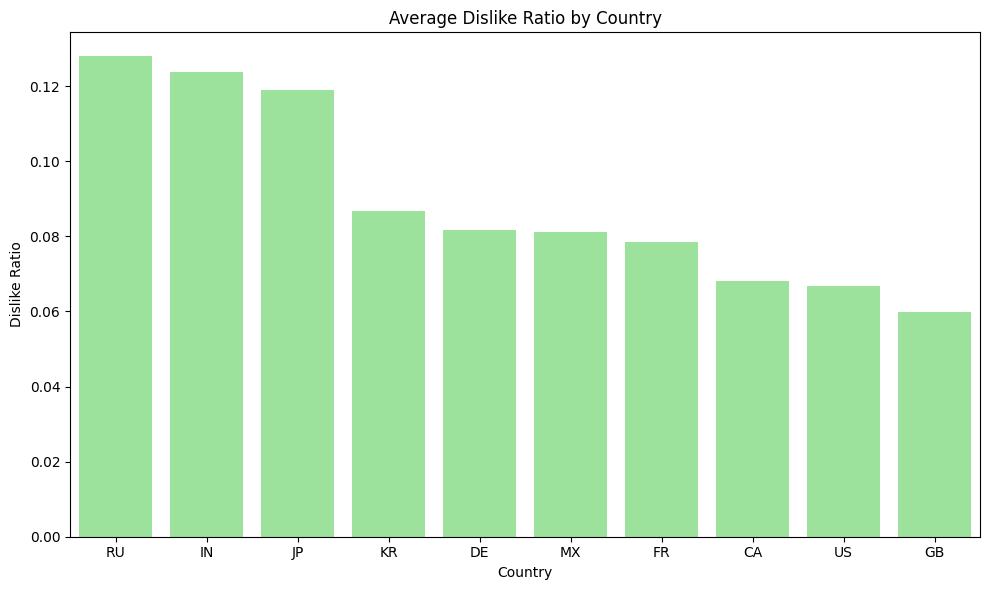

In [22]:
df['dislike_ratio'] = df['dislikes'] / (df['likes'] + df['dislikes'])

controversial_by_country = df.groupby('country')['dislike_ratio'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=controversial_by_country.index, y=controversial_by_country.values, color='lightgreen')
plt.title('Average Dislike Ratio by Country')
plt.ylabel('Dislike Ratio')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

#### 3. Does disabling comments impact engagement in certain countries more than others?

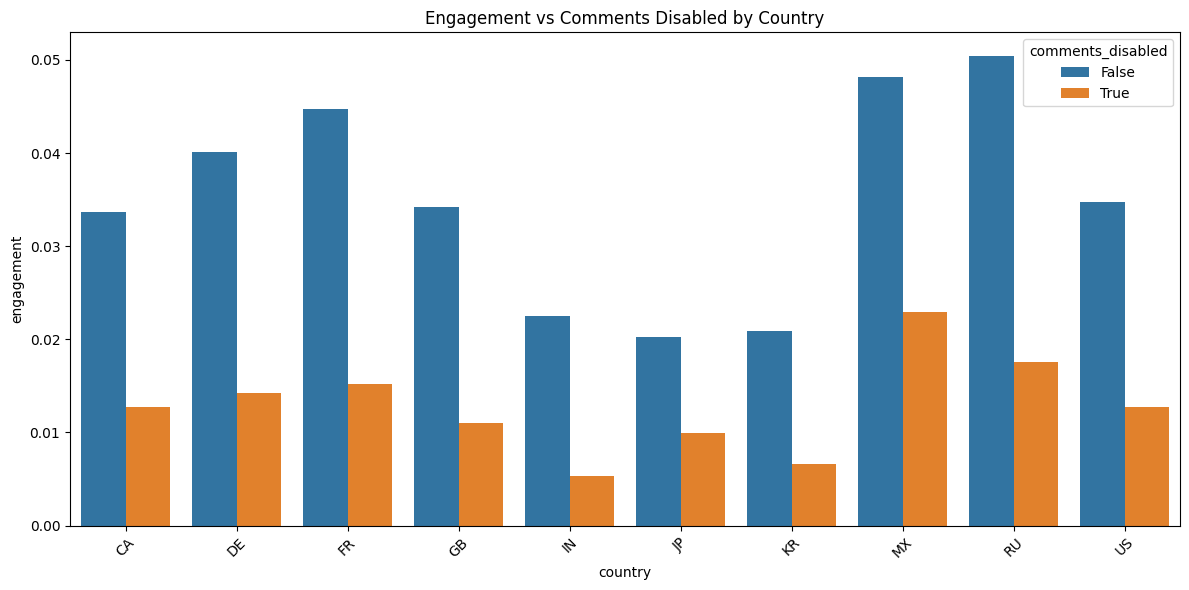

In [24]:
df['engagement'] = df['likes'] / df['views']

grouped = df.groupby(['country', 'comments_disabled'])['engagement'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='country', y='engagement', hue='comments_disabled')
plt.title('Engagement vs Comments Disabled by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4. Do engagement patterns differ for the same video categories when posted on weekdays vs. weekends in different countries?

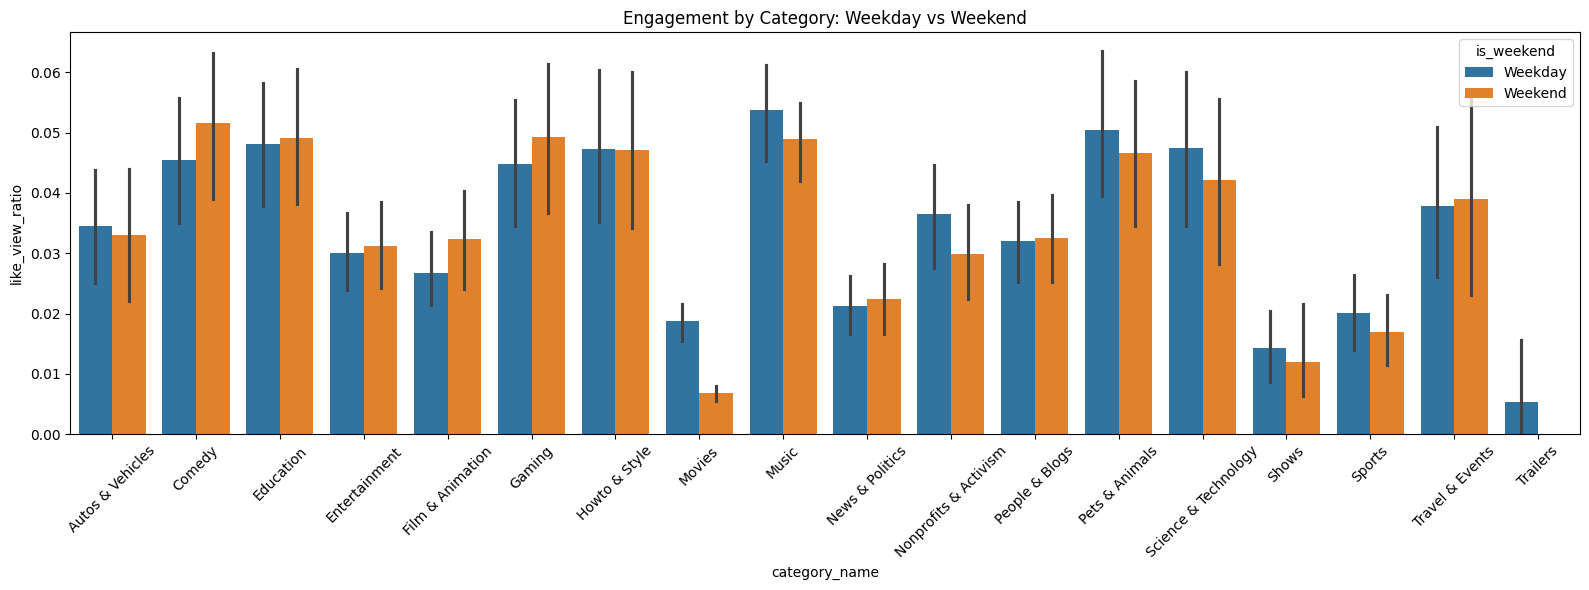

In [26]:
df['weekday'] = df['publish_time'].dt.dayofweek
df['is_weekend'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

weekend_engagement = df.groupby(['country', 'category_name', 'is_weekend'])['like_view_ratio'].mean().reset_index()

plt.figure(figsize=(16, 6))
sns.barplot(data=weekend_engagement, x='category_name', y='like_view_ratio', hue='is_weekend')
plt.title('Engagement by Category: Weekday vs Weekend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 5. Which video categories get the most comments on average?

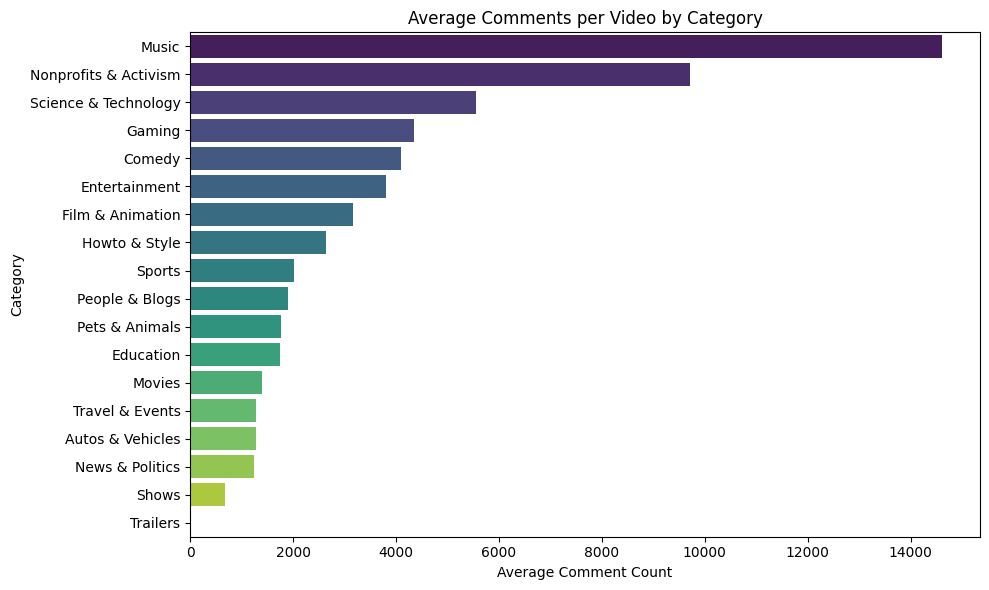

In [28]:
avg_comments = df.groupby('category_name')['comment_count'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_comments.values, y=avg_comments.index, palette='viridis')
plt.title('Average Comments per Video by Category')
plt.xlabel('Average Comment Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

#### 6. Which countries have the most trending videos?

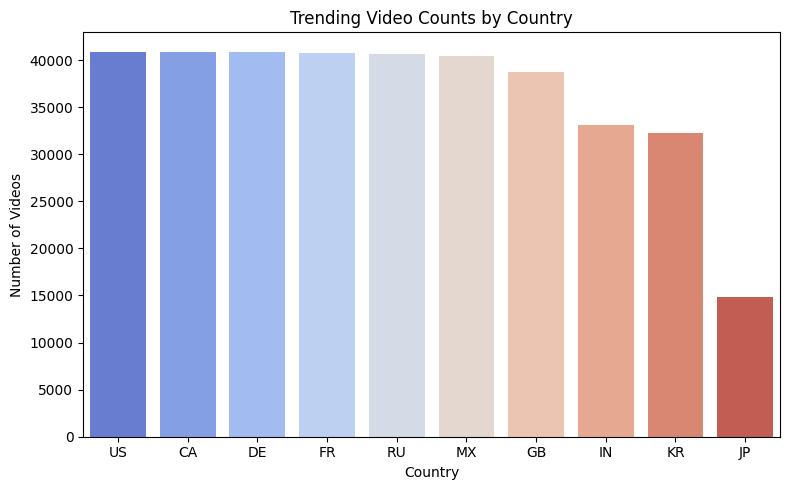

In [29]:
country_counts = df['country'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm')
plt.title('Trending Video Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

#### 7. Which hours of the day lead to the highest average views?

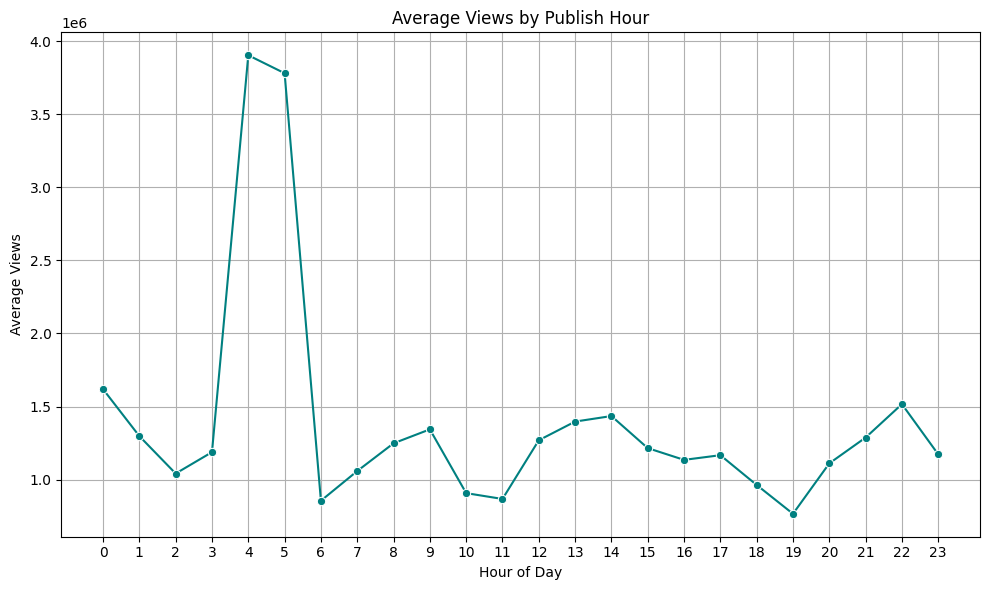

In [30]:
avg_views_by_hour = df.groupby('publish_hour')['views'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_views_by_hour.index, y=avg_views_by_hour.values, marker='o', color='teal')
plt.title('Average Views by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Views')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

#### 8. What are the most frequently trending video titles?

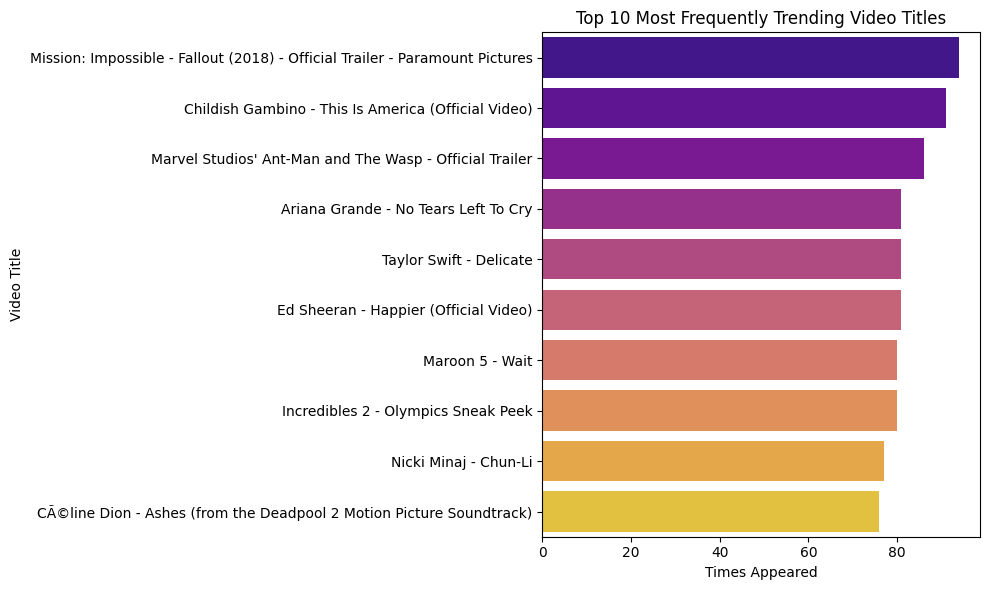

In [31]:
top_titles = df['title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='plasma')
plt.title('Top 10 Most Frequently Trending Video Titles')
plt.xlabel('Times Appeared')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

#### 9. Does disabling ratings affect views?

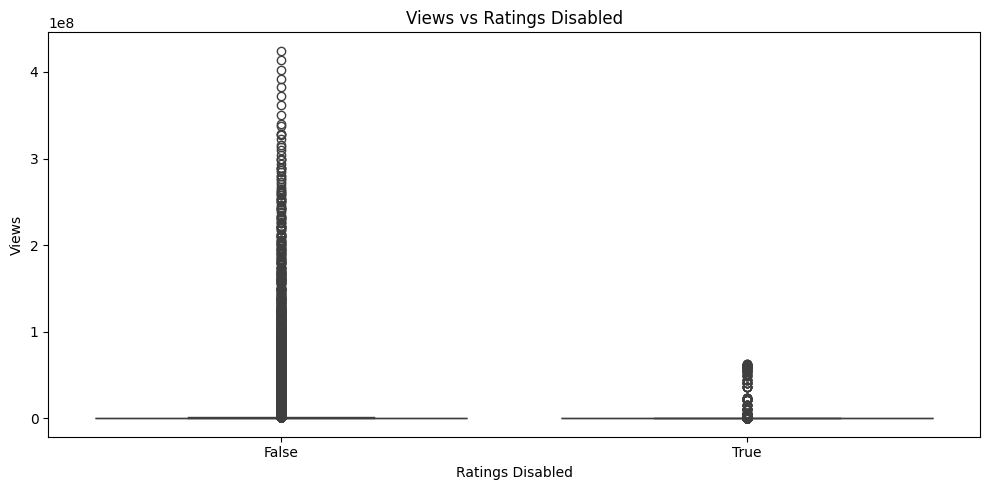

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='ratings_disabled', y='views', data=df)
plt.title('Views vs Ratings Disabled')
plt.xlabel('Ratings Disabled')
plt.ylabel('Views')
plt.tight_layout()
plt.show()

## Statistical Questions

### 1. Is there a significant association between the day of the week a video is published and its likelihood of trending?

We can treat this as a chi-squared test of independence:

Null hypothesis (H₀): The day of the week is independent of a video trending.

Alternative hypothesis (H₁): The day of the week is associated with a video trending.

In [ ]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_day'] = df['publish_time'].dt.day_name()

trending_counts = pd.crosstab(df['publish_day'], df['country'])

chi2, p, dof, expected = stats.chi2_contingency(trending_counts)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
if p < 0.05:
    print("There's a significant association between publish day and trending.")
else:
    print("No significant association found.")

Chi-square Statistic: 6950.798230606298
Degrees of Freedom: 54
P-value: 0.0
There's a significant association between publish day and trending.


### 2. Is there a significant difference in viewer engagement (likes-to-views ratio) across different video categories?

We’ll use the Kruskal-Wallis H Test, since engagement ratios are not normally distributed.

Null hypothesis (H₀): All categories have the same distribution of engagement.

Alternative hypothesis (H₁): At least one category has a different distribution.

In [36]:
df['like_view_ratio'] = df['likes'] / df['views']

df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['like_view_ratio'])

grouped_data = [group['like_view_ratio'].values for _, group in df.groupby('category_name')]
h_stat, p_value = stats.kruskal(*grouped_data)

print("H-statistic:", h_stat)
print("P-value:", p_value)
if p_value < 0.05:
    print("Significant difference in engagement across categories.")
else:
    print("No significant difference found.")

H-statistic: 45042.84571189221
P-value: 0.0
Significant difference in engagement across categories.
